## Read Dataset

In [67]:
import pandas as pd
df = pd.read_csv("data/Assignment-2_Data.csv")

In [68]:
df.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [108]:
df[df.y == 1]

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
83,59.0,admin.,married,secondary,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
86,56.0,admin.,married,secondary,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,1
87,41.0,technician,married,secondary,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
129,55.0,services,married,secondary,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,1
168,54.0,admin.,married,tertiary,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,-1.0,retired,married,secondary,2850.0,no,no,cellular,17,nov,300,1,40,8,failure,1
45205,-1.0,technician,single,secondary,505.0,no,yes,cellular,17,nov,386,2,-1,0,unknown,1
45206,51.0,technician,married,tertiary,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71.0,retired,divorced,primary,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,1


In [69]:
df.columns

Index(['Id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [70]:
df.shape

(45211, 18)

# Exploratory Data Analysis (EDA)

## Remove `Id`

In [71]:
del df['Id']

In [72]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Handle Missing Values | Remove null values

In [73]:
df.isnull().sum()

age          9
job          0
marital      0
education    0
default      0
balance      3
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [74]:
df = df.dropna()

In [75]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Understand dataset

In [76]:
df.y.value_counts()

y
no     39911
yes     5289
Name: count, dtype: int64

From the above analysis, we found `39911` people not subscribe or only `5289` people subscribe. So our dataset is highly unbalanced.

## Numerical and Categorical Columns

In [77]:
target = 'y'
numerical_col = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [78]:
df[numerical_col]

,age,balance,day,duration,campaign,pdays,previous
0,999.0,2143.0,5,261,1,-1,0
1,44.0,29.0,5,151,1,-1,0
2,33.0,2.0,5,76,1,-1,0
3,47.0,1506.0,5,92,1,-1,0
4,33.0,1.0,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51.0,825.0,17,977,3,-1,0
45207,71.0,1729.0,17,456,2,-1,0
45208,72.0,5715.0,17,1127,5,184,3
45209,57.0,668.0,17,508,4,-1,0


In [79]:
df[categorical_col]

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown
45208,retired,married,secondary,no,no,no,cellular,nov,success
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown


## Dealing with illogical values of `age`

In [80]:
df.age.value_counts()

age
32.0     2084
31.0     1996
33.0     1972
34.0     1930
35.0     1894
         ... 
92.0        2
93.0        2
88.0        2
94.0        1
999.0       1
Name: count, Length: 79, dtype: int64

In [81]:
df = df[df.age != 999.0]

In [82]:
df.age.value_counts()

age
32.0    2084
31.0    1996
33.0    1972
34.0    1930
35.0    1894
        ... 
88.0       2
90.0       2
92.0       2
95.0       2
94.0       1
Name: count, Length: 78, dtype: int64

## Feature Importance
### Categorical Variable through `Mutual Information`

In [83]:
from sklearn.metrics import mutual_info_score
scores = []
for col in categorical_col:
    score = mutual_info_score(df[target], df[col])
    scores.append(round(score, 4))
    print(col, round(score, 4))

job 0.0083
marital 0.0021
education 0.0026
default 0.0003
housing 0.0096
loan 0.0026
contact 0.0136
month 0.0243
poutcome 0.0294


In [84]:
scores

[0.0083, 0.0021, 0.0026, 0.0003, 0.0096, 0.0026, 0.0136, 0.0243, 0.0294]

In [85]:
list(zip(categorical_col, scores))

[('job', 0.0083),
 ('marital', 0.0021),
 ('education', 0.0026),
 ('default', 0.0003),
 ('housing', 0.0096),
 ('loan', 0.0026),
 ('contact', 0.0136),
 ('month', 0.0243),
 ('poutcome', 0.0294)]

In [86]:
import numpy as np
cat_data = np.array(list(zip(categorical_col, scores)), dtype=[('category', 'U10'), ('value', float)])

# Sort the NumPy array by the 'value' field
sorted_data = np.sort(cat_data, order='value')

# Convert the sorted NumPy array back to a list of tuples (optional)
sorted_list = sorted_data.tolist()

sorted_list

[('default', 0.0003),
 ('marital', 0.0021),
 ('education', 0.0026),
 ('loan', 0.0026),
 ('job', 0.0083),
 ('housing', 0.0096),
 ('contact', 0.0136),
 ('month', 0.0243),
 ('poutcome', 0.0294)]

### Here `default` feature is not so important, so we can remove it

In [87]:
del df['default']

In [88]:
categorical_col = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'poutcome']

## Feature Importance of `Numerical col`

In [89]:
df[target] = df[target].replace({'yes': 1, 'no': 0})

In [90]:
numerical_col + [target]

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']

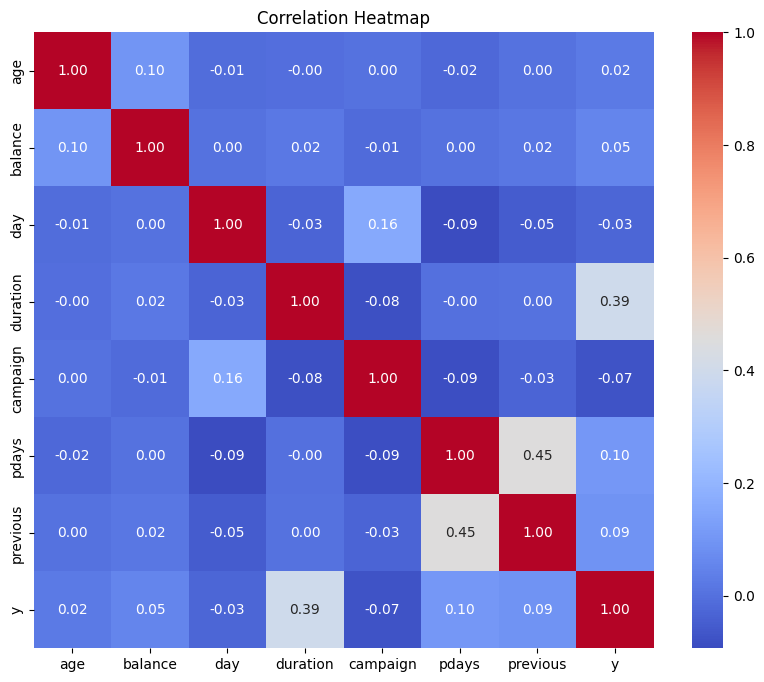

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df[numerical_col + [target]].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Split data into Train, Val and Test dataset

In [92]:
from sklearn.model_selection import train_test_split

def split_data(df):    
    df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
    df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

    len(df_train), len(df_val), len(df_test)

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = df_train[target].values
    y_val = df_val[target].values
    y_test = df_test[target].values

    del df_train[target]
    del df_val[target]
    del df_test[target]
    
    return df_train, y_train, df_val, y_val, df_test, y_test

In [93]:
df_train, y_train, df_val, y_val, df_test, y_test = split_data(df)

In [94]:
len(df_train), len(df_val), len(df_test)

(27119, 9040, 9040)

In [95]:
y_val

array([0, 0, 0, ..., 0, 1, 0])

In [96]:
y_train.sum(), y_val.sum(), y_test.sum()

(3202, 1000, 1087)

## Implement One-Hot encoding

In [97]:
def prepare_dictionaries(df: pd.DataFrame):
    dicts = df.to_dict(orient='records')
    return dicts

dict_train = prepare_dictionaries(df_train)
dict_val = prepare_dictionaries(df_val)
dict_test = prepare_dictionaries(df_test)

In [98]:
dict_train

[{'age': 39.0,
  'job': 'housemaid',
  'marital': 'married',
  'education': 'tertiary',
  'balance': 315.0,
  'housing': 'no',
  'loan': 'no',
  'contact': 'cellular',
  'day': 28,
  'month': 'aug',
  'duration': 53,
  'campaign': 4,
  'pdays': -1,
  'previous': 0,
  'poutcome': 'unknown'},
 {'age': 43.0,
  'job': 'housemaid',
  'marital': 'single',
  'education': 'primary',
  'balance': 1354.0,
  'housing': 'no',
  'loan': 'no',
  'contact': 'unknown',
  'day': 17,
  'month': 'jun',
  'duration': 183,
  'campaign': 2,
  'pdays': -1,
  'previous': 0,
  'poutcome': 'unknown'},
 {'age': 30.0,
  'job': 'services',
  'marital': 'single',
  'education': 'secondary',
  'balance': 1649.0,
  'housing': 'yes',
  'loan': 'no',
  'contact': 'unknown',
  'day': 23,
  'month': 'may',
  'duration': 206,
  'campaign': 1,
  'pdays': -1,
  'previous': 0,
  'poutcome': 'unknown'},
 {'age': 35.0,
  'job': 'management',
  'marital': 'married',
  'education': 'tertiary',
  'balance': 5367.0,
  'housing': '

## Train `LogisticRegression` model

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import make_pipeline

def get_train_pipeline(X, y):
    pipeline = make_pipeline(
        DictVectorizer(),
        LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    )
    pipeline.fit(X, y)
    return pipeline

pipeline = get_train_pipeline(dict_train, y_train)

## Evaluate Model
[ref](https://github.com/DataTalksClub/mlops-zoomcamp/blob/main/04-deployment/web-service-mlflow/random-forest.ipynb)

In [100]:
from sklearn.metrics import accuracy_score

def get_model_evaluation(pipeline, X, y):
    y_pred = pipeline.predict(X)
    acc = accuracy_score(y, y_pred)
    return round(acc, 4)

In [101]:
get_model_evaluation(pipeline, dict_val, y_val)

0.9023

In [102]:
get_model_evaluation(pipeline, dict_test, y_test)

0.9058

In [103]:
get_model_evaluation(pipeline, dict_train, y_train)

0.9005

## Save model

In [104]:
import pickle
output_file = 'model.bin'

def save_model(model, output_file):
    output_file_path = f'artifacts/{output_file}'
    with open(output_file_path,'wb') as f_out: 
        pickle.dump(model, f_out)
        
save_model(pipeline, output_file)

In [105]:
def load_model(model_file):
    model_file_path = f'artifacts/{model_file}'
    with open(model_file_path,'rb') as f_in: 
        return pickle.load(f_in)
    
model = load_model('model.bin')

In [106]:
get_model_evaluation(model, dict_test, y_test)

0.9058

In [109]:
y_pred = pipeline.predict(dict_test)

In [111]:
list(zip(y_pred, y_test))

[(0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 